In [1]:
%load_ext autoreload
%autoreload 2

from datasets import DataCifar10
from models import MultiLayerConvNet
from optimers import OptimerSGD, OptimerAdam
from utils import check_accuracy, check_gradient
from utils import show_training_infos, show_training_info

In [2]:
# load data
dataloader = DataCifar10('./datasets/cifar-10-batches-py', norm_dis_mean=True, norm_div_std=False,
                         num_val=1000, num_train=49000, num_test=1000)
    
print('Training data shape: ', dataloader.x_train.shape)
print('Training labels shape: ', dataloader.y_train.shape)
print('Validating data shape: ', dataloader.x_val.shape)
print('Validating labels shape: ', dataloader.y_val.shape)
print('Testing data shape: ', dataloader.x_test.shape)
print('Testing labels shape: ', dataloader.y_test.shape)

Training data shape:  (49000, 3, 32, 32)
Training labels shape:  (49000,)
Validating data shape:  (1000, 3, 32, 32)
Validating labels shape:  (1000,)
Testing data shape:  (1000, 3, 32, 32)
Testing labels shape:  (1000,)


# Sanity check

### Gradient check

In [3]:
def get_init_model(hyperparams):
    return MultiLayerConvNet([3, 32, 32], 10, hyperparams=hyperparams, seed=99)

# init model
model = get_init_model({'reg': 0.6, 'init_scale': None})

# sanity check
loss = model.backward(dataloader.x_train[0: 100, :], dataloader.y_train[0: 100])
print('Sanity check result:')
print('Init loss is', loss)

# gradient check
for i in range(1):
    print('\nGradient check result - ', i + 1, ':')
    check_gradient(model, dataloader.x_train[0: 100, :], dataloader.y_train[0: 100])

Sanity check result:
Init loss is 98.49625023668301

Gradient check result -  1 :
Layer | Key | Numerical gradient | Calculated gradient | Relative error
<class 'models.layers.Spatial_BatchNorm'> gamma -0.06349826833229599 -0.06361828285570416 0.0018882595899045297
<class 'models.layers.Spatial_BatchNorm'> beta -0.11593589590574992 -0.11594169305319983 5.0001791686228995e-05
<class 'models.layers.Conv'> W 0.024804927534205486 0.024804927541320753 2.8684892138162597e-10
<class 'models.layers.Conv'> b -0.06040902462700614 -0.060408180965728635 1.3965912774861933e-05
<class 'models.layers.Spatial_BatchNorm'> gamma 0.010733107558280606 0.010691422409230288 0.0038913478254628507
<class 'models.layers.Spatial_BatchNorm'> beta -0.017082334125007037 -0.01707502229255143 0.00042812636705390504
<class 'models.layers.Conv'> W 0.08418451358238599 0.08418451348401226 1.1685489611244918e-09
<class 'models.layers.Conv'> b 0.07665896788466853 0.07665896934434296 1.9041143694704783e-08
<class 'models.l

### Overfit small dataset

In [4]:
# load small dataset
smallloader = DataCifar10('./datasets/cifar-10-batches-py', 
                          num_train=100, num_test=100, num_val=100)

# init model
model = get_init_model({'reg': 0.})

optimer = OptimerAdam({'learn_rate': 1e-3, 
                       'num_iters': 200, 
                       'batch_size': 50}, print_every=20)

# train model
optimer.train(model, smallloader)

# save model
model.save('./saves/MultiLayerConvNet/model_small.pkl')

0 / 200 loss is 2.302585092003254
20 / 200 loss is 2.0680931889620955
40 / 200 loss is 1.622978166142199
60 / 200 loss is 0.9223760085558381
80 / 200 loss is 0.5780903695282831
100 / 200 loss is 0.2920631162708661
120 / 200 loss is 0.24594491483036487
140 / 200 loss is 0.21518604726852367
160 / 200 loss is 0.22892057964541415
180 / 200 loss is 0.25492021298156553


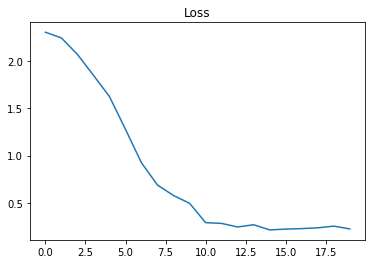

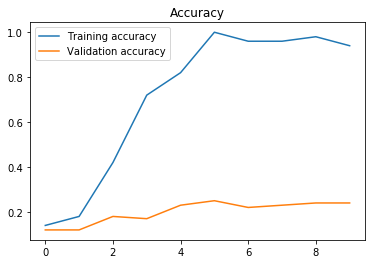

In [5]:
# plot loss curve
show_training_info(optimer)

In [7]:
# load model
model = MultiLayerConvNet()
model.load('./saves/MultiLayerConvNet/model_small.pkl')

# check accuracy
scores = model.predict(smallloader.x_test)
accuracy = check_accuracy(scores, smallloader.y_test)
    
print('The accuracy on testing dataset is ', accuracy)

The accuracy on testing dataset is  0.15


# Train multi-layer convnet

In [8]:
# init model
model = get_init_model({'reg': 0.01})

optimer = OptimerAdam({'learn_rate': 1e-3, 
                       'learn_rate_decay':0.9,
                       'num_iters': 10000, 
                       'batch_size': 64}, print_every=100)

# train model
optimer.train(model, dataloader)

# save model
model.save('./saves/MultiLayerConvNet/model.pkl')

0 / 10000 loss is 2.3025956250287014
100 / 10000 loss is 1.9938066130569412
200 / 10000 loss is 1.5974818049498138
300 / 10000 loss is 1.634304049446387
400 / 10000 loss is 1.5688731864954346
500 / 10000 loss is 1.6576699286043903
600 / 10000 loss is 1.5938190890229822
700 / 10000 loss is 1.3427119932132274
800 / 10000 loss is 1.204855038297352
900 / 10000 loss is 1.0607631081154385
1000 / 10000 loss is 0.9846010375008324
1100 / 10000 loss is 1.2044419429645898
1200 / 10000 loss is 1.4329249233222958
1300 / 10000 loss is 1.2225230773211173
1400 / 10000 loss is 1.3552110545906517
1500 / 10000 loss is 1.082046910852308
1600 / 10000 loss is 1.2049082836992493
1700 / 10000 loss is 1.136352654650193
1800 / 10000 loss is 1.206309649650693
1900 / 10000 loss is 1.2473015030935337
2000 / 10000 loss is 1.173453004319514
2100 / 10000 loss is 1.227412709318574
2200 / 10000 loss is 0.9384508727771241
2300 / 10000 loss is 1.3759007118495878
2400 / 10000 loss is 1.3053380430887807
2500 / 10000 loss i

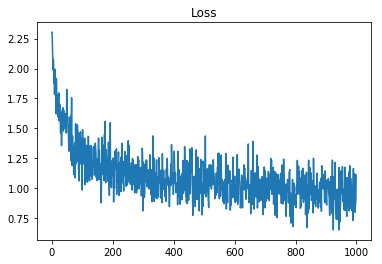

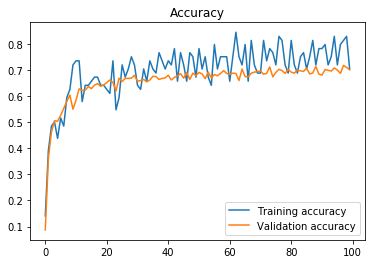

In [9]:
# plot loss curve
show_training_info(optimer)

In [11]:
# load model
model = MultiLayerConvNet()
model.load('./saves/MultiLayerConvNet/model.pkl')

# check accuracy
scores = model.predict(dataloader.x_test)
accuracy = check_accuracy(scores, dataloader.y_test)
    
print('The accuracy on testing dataset is ', accuracy)

The accuracy on testing dataset is  0.682
